 *Luis Antonio Ortega Andrés     
Antonio Coín Castro*

# Cuestiones previas

**Pregunta 1.** ¿Dado un conjunto de $n$ puntos, existe siempre un polinomio de grado $m < n-1$ que pase por dichos puntos?

Es posible que exista, pero en general no es verdad. Por ejemplo, dados tres puntos alineados existe un polinomio de grado 1 que pasa por ellos (una recta), pero se pueden escoger puntos no alineados de forma que no pase por ellos una recta, pero tampoco pase una parábola. De hecho, se puede demostrar fácilmente que tal polinomio existirá siempre que la correspondiente matriz de Vandermonde ampliada tenga el mismo rango que la matriz sin ampliar (teorema de *Rouché-Frobenius*).

**Pregunta 2.** ¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz permita calcular un polinomio de regresión adecuado?

Sabemos que en la regresión polinómica por mínimos cuadrados el vector de pesos solución ($w$) viene dado por la expresión
$$
(\tilde{X}^T\tilde{X})^{-1}\tilde{X}^Ty,
$$

donde $\tilde{X}=\Phi_n(X)$ es una transformación polinómica de grado $n$ (extendiendo las columnas) de los datos de entrada $X$. Si hacemos la descomposición de $\tilde{X}$ en valores singulares, seguramente podamos manipular la fórmula para obtener una solución a partir de estos valores singulares.


**Pregunta 3.** ¿Cómo podrías transformar el problema de encontrar un polinomio de regresión en un problema de producto de matrices?

Siguiendo la fórmula de la pregunta anterior (que se obtiene haciendo 0 el gradiente del error).


**Pregunta 4.** ¿Crees que, además, es posible calcular el error de regresión a partir de los valores singulares?

El error viene dado por $||\tilde{X}w-y||$, por lo que descomponiendo $\tilde{X}$ en valores singulares podríamos utilizarlos para calcular el error.


# Ejercicios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Apartado 1

Considera es sigiuente conjunto de puntos:

In [2]:
x = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
y = np.array([1.0, 1.284, 1.6487, 2.117, 2.7183])
m = len(x)
n = 3

Vamos a buscar el polinomio $P_2(x) = a_0 + a_1x + a_2x^2$ que minimiza el error al aproximar los datos anteriores usando la norma estándar de $\mathbb{R}^n$. Es decir, vamos a usar una regresión cuadrática.

- Vamos a escribir el problema de regresión como un problema de interpolación sobredimensionado asumiendo que el polinomio $P_2(x)$ pasa por todos los puntos $(x_i,y_i)$. Para ello escribiremos el problema en la forma $Xa = y$ donde $X$ es una matriz $5 \times 3$, $a$ es un vector $3 \times 1$ e $y$ es un vector $5 \times 1$. 

In [3]:
import numpy as np

# La matriz X será la matriz de Vandermonde 5x3 asociada a los x_i
X = np.vander(x, n, increasing=True)
print(X)

# Comprobamos que el sistema no tiene solución
print("Rango de X:", np.linalg.matrix_rank(X))
print("Rango de X ampliada:", np.linalg.matrix_rank(np.hstack((X,np.array(y).reshape(-1,1)))))

[[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]
Rango de X: 3
Rango de X ampliada: 4


- Calculad la descomposición en valores singulares $X = U S V^T$ de la matriz $X$ que habéis encontrado en el apartado anterior. Utilizad los apuntes de clase para obtener los valores singulares de $X$ y para construir las matrices $U$ de $5\times 5$, $S$ de $5\times 3$ y $V$ $3\times3$.

In [4]:
# Calculamos la descomposición SVD (el vector S contiene los valores singulares no nulos)
U, S, Vt = np.linalg.svd(X)

In [5]:
# U
print(U)

[[-0.29454913  0.63267484  0.63140925 -0.02576091 -0.33707876]
 [-0.346616    0.45500901 -0.21036331  0.28091869  0.74138797]
 [-0.41593037  0.19422733 -0.52439676 -0.68819061 -0.20169135]
 [-0.50249224 -0.14967019 -0.3106911   0.63666879 -0.47246617]
 [-0.60630161 -0.57668356  0.43075367 -0.20363596  0.26984831]]


In [6]:
# S
print(np.pad(np.diag(S), ((0, m-len(S)), (0, 0))))

[[2.71168512 0.         0.        ]
 [0.         0.93707467 0.        ]
 [0.         0.         0.16268803]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


In [7]:
# V^T
print(Vt)

[[-0.7987245  -0.4712162  -0.37415833]
 [ 0.59286357 -0.51017309 -0.62308604]
 [ 0.10272272 -0.71949893  0.68685467]]


## Apartado 2

Se puede demostrar (de hecho, no es muy difícil), que los valores $a = (a_0, a_1, a_2)$ del polinomio que buscamos se pueden obtener mediante el siguiente producto de matrices
$$
a = Vz
$$
El vector $z = (c_1/s_1, c_2/s_2, c_3/s_3)$, donde los valores $s_i$ corresponden a los valores singulares de la
matriz $X$ y los valores $c_i$ corresponden a los tres primeros valores del vector obtenido al
multiplicar la matriz $U^T$ por $y = (y_1, y_2, y_3, y_4, y_5)$.

*Demostración.* Para ver esto, observamos que, al ser $X=USV^T$ con $U,V$ ortogonales, se tiene:

$$
USV^T a = y 
$$
$$
SV^Ta = U^Ty
$$

Ahora, definimos la matriz $S^+$ como la matriz "inversa a la izquierda" de S, en el sentido de que $S^+S$ es la matriz identidad. Concretamente, podemos definirla como la matriz por bloques

$$
\renewcommand\arraystretch{1.3}
S^+=\left(
\begin{array}{c|c}
  S^{-1} & 0_{3\times 2} \\
\end{array}
\right), \quad \text{con } S^{-1}=\operatorname{diag}\{s_1^{-1},s_2^{-1}, s_3^{-1}\}.
$$

Multiplicando por $S^+$ a ambos lados de la igualdad que teníamos antes llegamos a la fórmula pedida:

$$
S^+SV^Ta=S^+U^Ty 
$$
$$
a=VS^+U^Ty 
$$
$$
a=Vz
$$

In [8]:
# Calculamos el vector 'a' con la fórmula
c = U.T@y
z = c[:n]/S
a = Vt.T@z
print("a =", a)

a = [1.00513714 0.86418286 0.84365714]


Podemos dibujar el polinomio obtenido junto con los valores reales, para ver gráficamente cómo de buena es la regresión realizada.

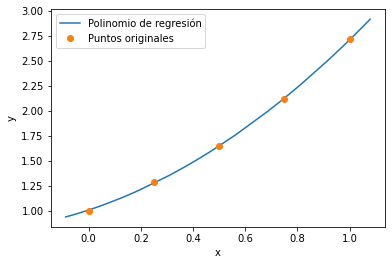

In [18]:
np.random.seed(1000)
x_random = np.sort(np.random.uniform(low=x[0]-0.1, high=x[-1]+0.1, size=(50,)))
X_random = np.vander(x_random, n, increasing=True)
plt.plot(x_random, X_random@a, label = "Polinomio de regresión")
plt.plot(x, y, "o", label = "Puntos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Vemos que la regresión es bastante buena. Podemos comparar nuestro vector de pesos $a$ con el vector que se obtiene haciendo regresión lineal con el módulo *sklearn*, y vemos que coincide.

In [10]:
lm = LinearRegression(fit_intercept=False).fit(X, y)
print("Sklearn:", lm.coef_)
print("Nuestro:", a)

Sklearn: [1.00513714 0.86418286 0.84365714]
Nuestro: [1.00513714 0.86418286 0.84365714]


## Apartado 3

Se puede demostrar también (es más fácil aun) que el error cometido con la regresión obtenida para los valores es $E = \sqrt{c_4^2 + c_5^2}$. Calculad el error y comparadlo con el cálculo manual del error, 
$$
\sqrt{\sum_{i=1}^5 (P_2(x_i) - y_i)^2}.
$$

*Demostración.* Como $U$ es ortogonal, tenemos $||U^Tx||_2=||x||_2 \ \forall x$, y podemos escribir:

$$
E=||Xa-y|| = ||U^TXa-U^Ty|| =||U^TUSV^Ta-U^Ty||=||SV^Ta-c||=||Sz-c||=||(SS^+-I)c||=||-(c_4, c_5)||.
$$

In [11]:
# Calculamos el error en los nodos
e_svd = np.linalg.norm(c[n:])
e_manual = np.linalg.norm(X@a-y)
print("Error a partir de los valores singulares:", e_svd)
print("Error a partir de la matriz X:", e_manual)
print("Diferencia absoluta entre los dos errores:", np.abs(e_svd-e_manual))
S_f = np.pad(np.diag(S), ((0, m-len(S)), (0, 0)))
S_inv = np.pad(np.diag(S**-1), ((0, 0), (0, 2)))

Error a partir de los valores singulares: 0.016556949339433427
Error a partir de la matriz X: 0.016556949339433483
Diferencia absoluta entre los dos errores: 5.551115123125783e-17


Ambas formas de calcular el error coinciden. Comprobamos cómo el error en los nodos no es 0, por lo que como ya sabíamos estamos ante una regresión y no una interpolación.

# Ejercicio opcional

- ¿Qué obtenemos cuando aplicamos el método de los apartados 1 y 2 a la construcción de un polinomio de grado 4?
- Comprueba que, efectivamente el polinomio obtenido se corresponde en este caso a un polinomio de interpolación en lugar de a un polinomio de regresión.

Sabemos teóricamente que en este caso el determinante de la matriz de Vandermonde (que es cuadrada) es no nulo, y de nuevo por el teorema de Rouché-Frobenius existe un único polinomio que pasa por los 5 puntos.

In [12]:
# Calculamos la nueva matriz X (cuadrada)
n5=5
X5 = np.vander(x, n5, increasing=True)
print(X5)

# Comprobamos que el sistema tiene solución
print("Determinante de X:", np.linalg.det(X5))

[[1.         0.         0.         0.         0.        ]
 [1.         0.25       0.0625     0.015625   0.00390625]
 [1.         0.5        0.25       0.125      0.0625    ]
 [1.         0.75       0.5625     0.421875   0.31640625]
 [1.         1.         1.         1.         1.        ]]
Determinante de X: 0.0002746582031249998


Vemos como efectivamente la matriz $X$ es cuadrada ($5\times 5$).

In [13]:
# Calculamos la descomposición SVD
U5, S5, V5t = np.linalg.svd(X5)

In [14]:
# U
print(U5)

[[-0.23136843 -0.56014795  0.63927512 -0.44514109 -0.16087157]
 [-0.27818994 -0.49480826  0.03026585  0.61199904  0.54983297]
 [-0.3558808  -0.34389454 -0.45640314  0.21766116 -0.70668607]
 [-0.48857455 -0.02731584 -0.50512248 -0.58374068  0.40576699]
 [-0.7097343   0.5677935   0.35631272  0.19793187 -0.08804538]]


In [15]:
# S
print(np.pad(np.diag(S5), ((0, m-len(S5)), (0, 0))))

[[2.98659464 0.         0.         0.         0.        ]
 [0.         1.23790316 0.         0.         0.        ]
 [0.         0.         0.31721696 0.         0.        ]
 [0.         0.         0.         0.05382652 0.        ]
 [0.         0.         0.         0.         0.00435088]]


In [16]:
# V^T
print(V5t)

[[-6.91003725e-01 -4.43198108e-01 -3.65270378e-01 -3.23004499e-01
  -2.97211934e-01]
 [-6.93408912e-01  2.03293192e-01  3.51828157e-01  4.08393361e-01
   4.32767570e-01]
 [ 2.02788911e-01 -7.66554977e-01 -1.26184421e-01  2.73114937e-01
   5.29863990e-01]
 [-2.39603968e-02  4.07915921e-01 -7.01457823e-01 -2.14830918e-01
   5.42987201e-01]
 [-6.99932542e-04  9.08040962e-02 -4.84591492e-01  7.79832588e-01
  -3.85728334e-01]]


Vemos que las matrices $U,S$ y $V$ son también cuadradas de $5 \times 5$. Calculamos ahora el vector $a$ con su fórmula para este caso, y medimos el error en los nodos.

In [17]:
# Calculamos 'a'
c5 = U5.T@y
z5 = c5/S5
a5 = V5t.T@z5

# Medimos el error en los nodos
e5 = np.linalg.norm(X5@a5-y)
print("Error en los nodos:", e5)

Error en los nodos: 1.2161883888976235e-15


El error en los nodos sale 0, por lo que efectivamente se trata de un polinomio de interpolación (pasa por todos los nodos). La resolución del sistema no es aproximada, sino que es exacta, ya que en este caso el sistema no está sobredimensionado.